In [52]:
# data analysis for the project
# Oran Howard 18672266
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fifa_results_final = pd.read_csv('fifa_results_final.csv')
fifa_results_final = fifa_results_final.drop(fifa_results_final.columns[[0]], axis=1)   
fifa_results_final

,FTR,ID,HomeTeam,AwayTeam,FTHG,FTAG,Season,Hshot,Ashot,HST,AST,HTR,HTP,HTW,HTV,ATR,ATP,ATW,ATV
0,H,1,Arsenal,Leicester City,4,3,2017/18,27,6,10,3,80.8125,83.1875,62000.000000,1.264545e+07,79.9375,82.3125,60030.303030,1.046273e+07
1,A,2,Brighton & Hove Albion,Manchester City,0,2,2017/18,6,14,2,4,76.1875,78.9375,32363.636364,5.399242e+06,85.0000,87.1875,114090.909091,2.264470e+07
2,A,3,Chelsea,Burnley,2,3,2017/18,19,10,6,5,82.6875,85.5625,81757.575758,1.825076e+07,76.8125,77.5000,30866.666667,5.014333e+06
3,H,9,Manchester United,West Ham United,4,0,2017/18,22,9,6,1,82.2500,85.3125,89393.939394,1.709485e+07,78.3125,80.5625,25757.575758,6.689242e+06
4,A,12,Burnley,West Bromwich Albion,0,1,2017/18,20,8,0,1,76.8125,77.5000,30866.666667,5.014333e+06,73.6250,75.8125,36281.250000,2.804844e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,A,1407,Sheffield United,Southampton,0,2,2020/21,8,15,2,5,75.8750,78.7500,20451.612903,4.687258e+06,76.5000,79.0625,30939.393939,5.550758e+06
796,A,1411,Liverpool,Fulham,0,1,2020/21,16,10,3,3,85.7500,87.4375,95575.757576,2.547348e+07,75.3125,78.5000,48969.696970,4.505303e+06
797,H,1414,Chelsea,Everton,2,0,2020/21,19,7,9,1,82.6875,85.5625,81757.575758,1.825076e+07,79.4375,81.6250,56727.272727,9.726515e+06
798,D,1418,Leeds,Chelsea,0,0,2020/21,7,15,4,8,73.7500,75.8750,36742.424242,3.087879e+06,82.6875,85.5625,81757.575758,1.825076e+07


Average away team goals: 1.2
Average home team goals: 1.5
Total number of matches: 800
Number of features: 18
Number of matches won by home team: 359
Number of matches won by away team: 251
Win rate of home team: 44.88%
Win rate of away team: 31.37%


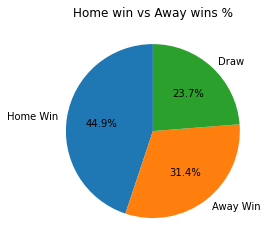

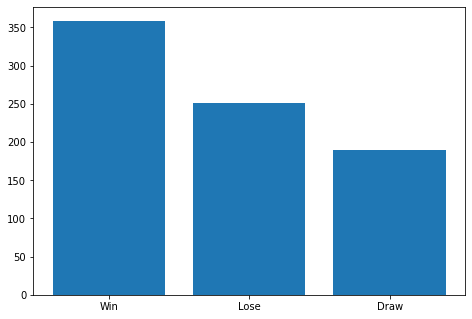

In [53]:
# look at statistics from the data

n_matches = fifa_results_final.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = fifa_results_final.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(fifa_results_final[fifa_results_final.FTR == 'H'])

# Calculate matches won by away team.

n_awaywins = len(fifa_results_final[fifa_results_final.FTR == 'A'])

n_draws = len(fifa_results_final[fifa_results_final.FTR == 'D'])

# Calculate win rate for home team.
home_win_rate = (float(n_homewins) / (n_matches)) * 100

# Calculate win rate for away team.
away_win_rate = (float(n_awaywins) / (n_matches)) * 100

# Calculate draw
draw_rate = (float(n_draws) / (n_matches)) * 100
# Calculate average goals scored by the home team
average_home_goals = fifa_results_final.FTHG.mean()
# Calculate average goals scored by the away team
average_away_goals = fifa_results_final.FTAG.mean()

seasons = fifa_results_final.Season.unique()

n_goals = fifa_results_final.FTHG + fifa_results_final.FTAG

fifa_results_final['TotalGoals'] = n_goals 


# Print the results
print("Average away team goals: {:.2}".format(average_away_goals))
print("Average home team goals: {:.2}".format(average_home_goals))
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Number of matches won by away team: {}".format(n_awaywins))
print("Win rate of home team: {:.2f}%".format(home_win_rate))
print("Win rate of away team: {:.2f}%".format(away_win_rate))

#creates piechart to show the home win rate vs away win rate
homeaway_wins = [home_win_rate, away_win_rate, draw_rate]
activities = ['Home Win', 'Away Win', 'Draw']
plt.pie(homeaway_wins, labels=activities, startangle=90, autopct='%.1f%%')
plt.title('Home win vs Away wins %')
plt.show()

#creates bar chart --- need to figure how to add axes lables
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
wld = ['Win', 'Lose', 'Draw']
total_wld = [n_homewins, n_awaywins, n_draws]
ax.bar(wld, total_wld)
plt.show()
#total goals for each season 


In [54]:
from scipy.stats import poisson,skellam
# probability of draw between home and away team

average_away_goals
average_home_goals
skellam.pmf(0.0,  average_home_goals, average_away_goals)
# probability of home team winning by one goal
skellam.pmf(1,  average_home_goals, average_away_goals)


0.22301707523527536

## Home advantage 

From the initial analysis above it can be seen that the home team has a higher chance of winning the game. 
Win rate of home team: 44.9%
Win rate of away team: 31.4%
This should be taken into account when creating the prediction model as the difference is significant.

In [55]:
team_ratings = pd.read_csv('team_ratings.csv')

In [56]:
# function to create bar charts

def makebar(y, xlabels, xlabel, ylabel, title):
    plt.figure()
    bar_width = 0.50
    x = np.arange(len(y))
    #fig, ax = plt.subplots()
    plt.barh(xlabels,y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

#makebar(team_ratings['Total_Rating'], team_ratings['Team'], 'Overall Rating', 'Teams', 
        #'Teams Overall Rating')

#makebar(team_ratings['team_wage'], team_ratings['Team'], 'Overall Rating', 'Teams', 
       # 'Teams Overall Rating')

#makebar(team_ratings['team_value'], team_ratings['Team'], 'Overall Rating', 'Teams', 
        #'Teams Overall Rating')

fifa_results_final

,FTR,ID,HomeTeam,AwayTeam,FTHG,FTAG,Season,Hshot,Ashot,HST,AST,HTR,HTP,HTW,HTV,ATR,ATP,ATW,ATV,TotalGoals
0,H,1,Arsenal,Leicester City,4,3,2017/18,27,6,10,3,80.8125,83.1875,62000.000000,1.264545e+07,79.9375,82.3125,60030.303030,1.046273e+07,7
1,A,2,Brighton & Hove Albion,Manchester City,0,2,2017/18,6,14,2,4,76.1875,78.9375,32363.636364,5.399242e+06,85.0000,87.1875,114090.909091,2.264470e+07,2
2,A,3,Chelsea,Burnley,2,3,2017/18,19,10,6,5,82.6875,85.5625,81757.575758,1.825076e+07,76.8125,77.5000,30866.666667,5.014333e+06,5
3,H,9,Manchester United,West Ham United,4,0,2017/18,22,9,6,1,82.2500,85.3125,89393.939394,1.709485e+07,78.3125,80.5625,25757.575758,6.689242e+06,4
4,A,12,Burnley,West Bromwich Albion,0,1,2017/18,20,8,0,1,76.8125,77.5000,30866.666667,5.014333e+06,73.6250,75.8125,36281.250000,2.804844e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,A,1407,Sheffield United,Southampton,0,2,2020/21,8,15,2,5,75.8750,78.7500,20451.612903,4.687258e+06,76.5000,79.0625,30939.393939,5.550758e+06,2
796,A,1411,Liverpool,Fulham,0,1,2020/21,16,10,3,3,85.7500,87.4375,95575.757576,2.547348e+07,75.3125,78.5000,48969.696970,4.505303e+06,1
797,H,1414,Chelsea,Everton,2,0,2020/21,19,7,9,1,82.6875,85.5625,81757.575758,1.825076e+07,79.4375,81.6250,56727.272727,9.726515e+06,2
798,D,1418,Leeds,Chelsea,0,0,2020/21,7,15,4,8,73.7500,75.8750,36742.424242,3.087879e+06,82.6875,85.5625,81757.575758,1.825076e+07,0


In [57]:
# calculates the difference in a the hometeams and awayteams rating
def calulcate_dif_rating():

    dif_rating = []

    HomeTeam_Rating =  fifa_results_final['HTR']
    AwayTeam_Rating = fifa_results_final['ATR']
    Differnce_Rating = HomeTeam_Rating - AwayTeam_Rating
    
    for i in Differnce_Rating:
        dif_rating.append(i)
        
    fifa_results_final['Difference_Rating'] = dif_rating

calulcate_dif_rating()
fifa_results_final

,FTR,ID,HomeTeam,AwayTeam,FTHG,FTAG,Season,Hshot,Ashot,HST,...,HTR,HTP,HTW,HTV,ATR,ATP,ATW,ATV,TotalGoals,Difference_Rating
0,H,1,Arsenal,Leicester City,4,3,2017/18,27,6,10,...,80.8125,83.1875,62000.000000,1.264545e+07,79.9375,82.3125,60030.303030,1.046273e+07,7,0.8750
1,A,2,Brighton & Hove Albion,Manchester City,0,2,2017/18,6,14,2,...,76.1875,78.9375,32363.636364,5.399242e+06,85.0000,87.1875,114090.909091,2.264470e+07,2,-8.8125
2,A,3,Chelsea,Burnley,2,3,2017/18,19,10,6,...,82.6875,85.5625,81757.575758,1.825076e+07,76.8125,77.5000,30866.666667,5.014333e+06,5,5.8750
3,H,9,Manchester United,West Ham United,4,0,2017/18,22,9,6,...,82.2500,85.3125,89393.939394,1.709485e+07,78.3125,80.5625,25757.575758,6.689242e+06,4,3.9375
4,A,12,Burnley,West Bromwich Albion,0,1,2017/18,20,8,0,...,76.8125,77.5000,30866.666667,5.014333e+06,73.6250,75.8125,36281.250000,2.804844e+06,1,3.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,A,1407,Sheffield United,Southampton,0,2,2020/21,8,15,2,...,75.8750,78.7500,20451.612903,4.687258e+06,76.5000,79.0625,30939.393939,5.550758e+06,2,-0.6250
796,A,1411,Liverpool,Fulham,0,1,2020/21,16,10,3,...,85.7500,87.4375,95575.757576,2.547348e+07,75.3125,78.5000,48969.696970,4.505303e+06,1,10.4375
797,H,1414,Chelsea,Everton,2,0,2020/21,19,7,9,...,82.6875,85.5625,81757.575758,1.825076e+07,79.4375,81.6250,56727.272727,9.726515e+06,2,3.2500
798,D,1418,Leeds,Chelsea,0,0,2020/21,7,15,4,...,73.7500,75.8750,36742.424242,3.087879e+06,82.6875,85.5625,81757.575758,1.825076e+07,0,-8.9375


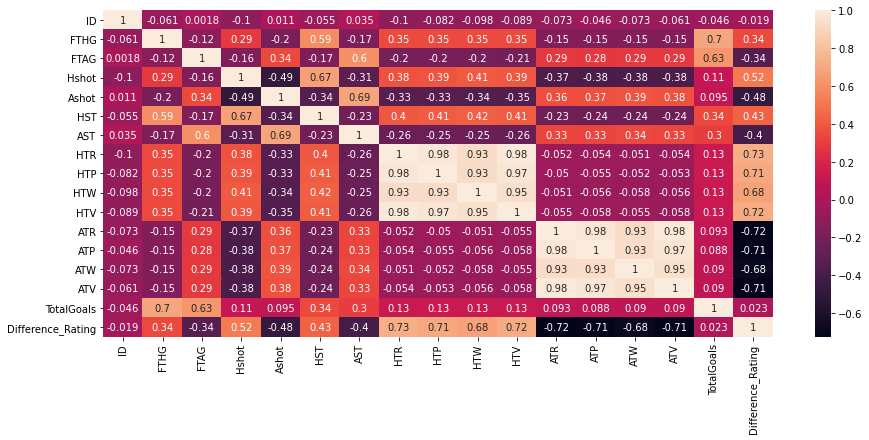

In [58]:
# create a correlation matrix 
import seaborn as sns 

cor= fifa_results_final.corr()
cor

plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True)

## Correlation Matrix

The correlation Matrix shows that there is a high correlation between teams rating, wages, value, and potential. 
A high correlation shows that using all the feautes will not be useful when it comes to prediction.

Moreover, it can be seen that shots on target is an important feature. 

In [59]:
# view every teams average home stats vs average away teams stats 
home_averages = fifa_results_final.drop(fifa_results_final.columns[[0,1,11,12,13,14,15,16,17,18,19]], axis=1)   
home_averages.groupby('HomeTeam').mean()
# view every teams average away stats vs average home teams stats
away_averages = fifa_results_final.drop(fifa_results_final.columns[[0,1,11,12,13,14,15,16,17,18,19]], axis=1)   
away_averages.groupby('AwayTeam').mean()

,FTHG,FTAG,Hshot,Ashot,HST,AST,Difference_Rating
AwayTeam,,,,,,,
Arsenal,1.557692,1.211538,13.538462,10.596154,4.923077,3.538462,-1.544471
Aston Villa,1.565217,1.043478,16.173913,10.739130,4.478261,3.739130,2.872283
Brighton & Hove Albion,1.622222,0.755556,17.355556,9.644444,5.466667,3.000000,3.637500
Burnley,1.576923,0.942308,18.826923,8.115385,5.692308,2.653846,2.918269
Chelsea,1.452830,1.509434,10.226415,14.339623,3.886792,4.679245,-3.501179
Crystal Palace,1.725490,0.980392,15.588235,9.509804,5.431373,3.313725,2.314951
Everton,1.735849,1.018868,13.226415,10.320755,4.773585,3.773585,-0.074292
Fulham,2.000000,0.761905,15.333333,9.714286,5.666667,3.380952,4.122024
Leeds,2.142857,1.714286,15.571429,14.142857,6.285714,5.571429,5.946429


In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

#classification_data = fifa_results_final.drop(fifa_results_final.columns[[1,2,3,6]], axis=1)   

df_val = classification_data.values
#assigns all the columns except the first column to the variable X
X = df_val[:,1:18]
#assigns only the first column as variable Y
Y = df_val[:,0]

labelencoder = LabelEncoder()
# Assigning numerical values to Y using sklearn LabelEncoder()
# Encode target labels with value between 0 and n_classes-1 (scikit-learn, n.d)
# Changes status column to = 0 when cancerous and 1 when healthy
Y = labelencoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2,shuffle=True)
Y_train

array([1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1,
       1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2,
       1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 1,
       2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1,
       0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1,

In [62]:
target_names = ['Home Win', 'Draw', 'Away Win']

clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(500,500))
clf.fit(X_train,Y_train)
Y_predict = clf.predict(X_test)

confusion_matrix(Y_test, Y_predict)

print('Artifical Neural Network:')
print(classification_report(Y_test, Y_predict, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, Y_predict))
predictions = clf.predict_proba(X_test)
print('\nProbability of Home Win, Draw, Away Win\n',predictions)

rfc5 = RandomForestClassifier(n_estimators=1000,min_samples_leaf=5)
#Builds a forest of trees from the training set (X, y).
rfc5.fit(X_train, Y_train)
#The same steps are repeated that were performed on the MLP Classifier
rfc5_predict = rfc5.predict(X_test)
confusion_matrix(Y_test, rfc5_predict)
print('\nRandom Forest for 5 leaf nodes:')
print(classification_report(Y_test, rfc5_predict, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, rfc5_predict))
predictions = rfc5.predict_proba(X_test)
print('\nProbability of Home Win, Draw, Away Win\n',predictions)

#The same is repeated for 50 leaf nodes instead of 5.
rfc50 = RandomForestClassifier(n_estimators=1000,min_samples_leaf=50)
rfc50.fit(X_train, Y_train)
rfc50_predict = rfc50.predict(X_test)
confusion_matrix(Y_test, rfc50_predict)
print('\nRandom Forest for 50 leaf nodes:')
print(classification_report(Y_test, rfc50_predict, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, rfc50_predict))
predictions = rfc50.predict_proba(X_test)
print('\nProbability of Home Win, Draw, Away Win\n',predictions)




/Users/oran/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Artifical Neural Network:
              precision    recall  f1-score   support

    Home Win       0.45      0.39      0.42        56
        Draw       0.17      0.08      0.11        37
    Away Win       0.47      0.66      0.55        67

    accuracy                           0.43       160
   macro avg       0.36      0.38      0.36       160
weighted avg       0.39      0.43      0.40       160

accuracy =  0.43125

Probability of Home Win, Draw, Away Win
 [[0.38713326 0.28407661 0.32879012]
 [0.79117071 0.18298831 0.02584098]
 [0.25372771 0.0851429  0.66112939]
 [0.0267697  0.04588623 0.92734406]
 [0.04343587 0.19297764 0.76358649]
 [0.36512906 0.09988078 0.53499016]
 [0.01682968 0.03120212 0.9519682 ]
 [0.00971582 0.0655313  0.92475288]
 [0.09631698 0.05167506 0.85200796]
 [0.07385883 0.03495147 0.8911897 ]
 [0.11762821 0.38000968 0.50236211]
 [0.01682968 0.03120212 0.9519682 ]
 [0.07385883 0.03495147 0.8911897 ]
 [0.14637326 0.04149095 0.81213579]
 [0.03007916 0.03984535 0.9


Random Forest for 50 leaf nodes:
              precision    recall  f1-score   support

    Home Win       0.82      0.71      0.76        56
        Draw       0.55      0.43      0.48        37
    Away Win       0.72      0.88      0.79        67

    accuracy                           0.72       160
   macro avg       0.70      0.68      0.68       160
weighted avg       0.71      0.72      0.71       160

accuracy =  0.71875

Probability of Home Win, Draw, Away Win
 [[0.73448658 0.15108355 0.11442987]
 [0.75342609 0.16891913 0.07765478]
 [0.10878666 0.20206775 0.6891456 ]
 [0.28217997 0.22297259 0.49484745]
 [0.20246892 0.32544582 0.47208526]
 [0.2408255  0.38252806 0.37664644]
 [0.24214524 0.22009753 0.53775723]
 [0.33291923 0.3976969  0.26938388]
 [0.2024034  0.34165751 0.45593909]
 [0.11169584 0.1706499  0.71765426]
 [0.23741873 0.31154918 0.45103208]
 [0.54344864 0.19646894 0.26008242]
 [0.04851983 0.10840797 0.84307219]
 [0.57229392 0.21126538 0.2164407 ]
 [0.31189039 0.4045

In [65]:
# output probabilities in a readable way 

In [25]:
print('Computing')
#Create a svm Classifier
tt = svm.SVC() # Linear Kernel

#Train the model using the training sets
tt.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = tt.predict(X_test)
print('accuracy = ', accuracy_score(Y_test, y_pred))


Computing
accuracy =  0.55625
